## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset from GitHub

In [62]:
data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check for Duplicate Customers

In [63]:
data.dropna(inplace=True)
data.duplicated('CustomerId').sum()

0

There are no duplicate customer entries in the data.
#### Now we can use CustomerID as Index for our Dataset

In [64]:
data.set_index('CustomerId',inplace=True)
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Surname has no relevance, so we can drop the column.

In [65]:
data.drop('Surname',axis=1,inplace=True)

## Encoding Categorical Columns

First, lets check the categories

In [66]:
geo = data['Geography'].unique()
geo

array(['France', 'Spain', 'Germany'], dtype=object)

In [67]:
gen = data['Gender'].unique()
gen

array(['Female', 'Male'], dtype=object)

Defining the encoding function

In [68]:
def encode(ar,x):
    return np.where(ar==x)

#### Performing Encoding Operations

In [69]:
data['Geography'] = data['Geography'].apply(lambda x: encode(geo,x)[0][0])
data['Gender'] = data['Gender'].apply(lambda x: encode(gen,x)[0][0])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


### Let's check other columns

In [10]:
data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

We should club [3,4] with [2] as they have small representations and would cause imbalance.

In [70]:
data['NumProds'] = data['Num Of Products'].apply(lambda x : 1*(x>1))
data.drop('Num Of Products',axis=1,inplace = True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,NumProds
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,101348.88,1,0
15647311,608,1,0,41,1,83807.86,0,1,112542.58,0,0
15619304,502,0,0,42,8,159660.80,1,0,113931.57,1,1
15701354,699,0,0,39,1,0.00,0,0,93826.63,0,1
15737888,850,1,0,43,2,125510.82,1,1,79084.10,0,0


In [12]:
data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

Data has a decently balanced distribution for Tenure.

In [13]:
data['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

Data is slightly unbalanced incase of CC and Non-CC Users

In [14]:
data['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

Data is well balanced for Active and Inactive Members

In [15]:
data['Estimated Salary'].mean()

100090.239881

We can dive deeper into the distribution for Salaries using EDA later.

In [71]:
data.loc[(data['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

We will perform Feature Engineering to create a HasZeroBalance column

In [72]:
data['HasZeroBalance'] = data['Balance'].apply(lambda x : 1*(x==0))
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,NumProds,HasZeroBalance
CustomerId,,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,101348.88,1,0,1
15647311,608,1,0,41,1,83807.86,0,1,112542.58,0,0,0
15619304,502,0,0,42,8,159660.80,1,0,113931.57,1,1,0
15701354,699,0,0,39,1,0.00,0,0,93826.63,0,1,1
15737888,850,1,0,43,2,125510.82,1,1,79084.10,0,0,0


## Exploratory Data Analysis

### Histogram for Age Distribution

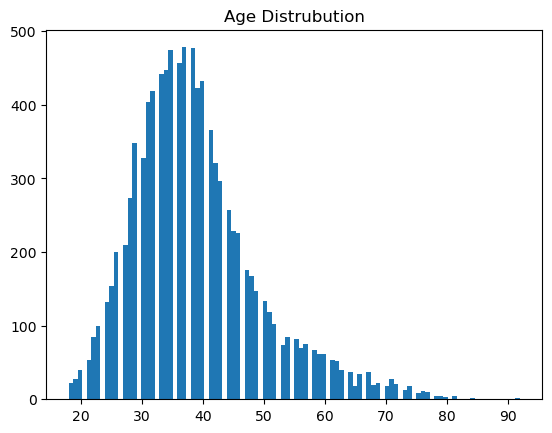

In [18]:
plt.hist(data['Age'],bins=100)
plt.title('Age Distrubution')
plt.show()

### Histogram for Salaries

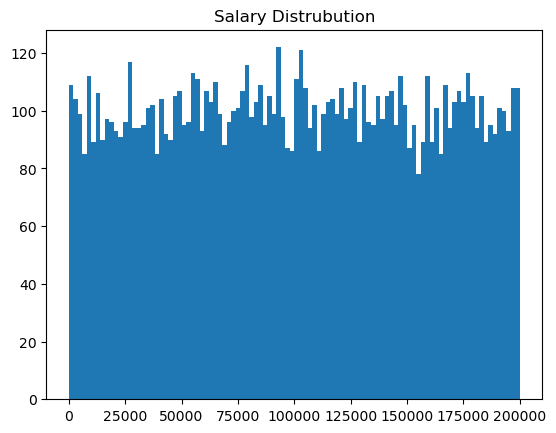

In [19]:
plt.hist(data['Estimated Salary'],bins=100)
plt.title('Salary Distrubution')
plt.show()

### Histogram for Balance

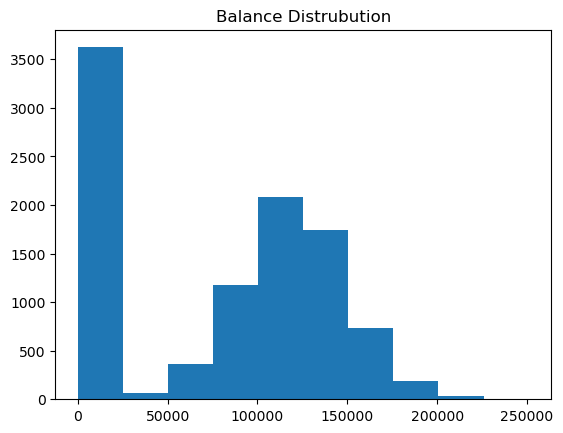

In [31]:
plt.hist(data['Balance'])
plt.title('Balance Distrubution')
plt.show()

# Handling Data Imbalance

In [21]:
import imblearn

In [73]:
X = data.drop('Churn',axis=1)
y = data['Churn']
print('No. of Records:',y.shape)
y.value_counts()

No. of Records: (10000,)


Churn
0    7963
1    2037
Name: count, dtype: int64

In [74]:
oversample = imblearn.over_sampling.SMOTE()
X, y = oversample.fit_resample(X, y)
print('No. of Records:',y.shape)
y.value_counts()

No. of Records: (15926,)


Churn
1    7963
0    7963
Name: count, dtype: int64

## Splitting Dataset into Train-Test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Standardizing Continuous Variables

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
Scaler = StandardScaler()
X_train[['CreditScore','Age','Tenure','Estimated Salary']] = Scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Estimated Salary']] = Scaler.transform(X_test[['CreditScore','Age','Tenure','Estimated Salary']])

In [79]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,NumProds,HasZeroBalance
8116,-0.103457,2,0,0.211197,1.548764,94752.490000,1,0,1.449782,0,0
6105,-0.354522,0,0,-0.695837,-1.766982,131244.650000,1,0,1.436250,1,0
15681,1.250109,1,1,1.521358,0.075099,107303.561204,0,0,-1.312450,0,0
5723,0.409588,0,0,-1.502090,0.443515,0.000000,1,1,-1.180561,1,1
7924,2.003303,0,1,0.614324,-1.030150,0.000000,1,1,1.419168,1,1


# Model Training

## SKLEARN SVM CLASSIFIER

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svm = SVC()
svm.fit(X_train,y_train)
y_ = svm.predict(X_test)

In [51]:
print(classification_report(y_test,y_))
confusion_matrix(y_test,y_)

              precision    recall  f1-score   support

           0       0.64      0.39      0.49      2662
           1       0.55      0.78      0.65      2594

    accuracy                           0.58      5256
   macro avg       0.60      0.58      0.57      5256
weighted avg       0.60      0.58      0.56      5256



array([[1039, 1623],
       [ 583, 2011]], dtype=int64)

Let's try GridSearch to improve the model.

In [52]:
from sklearn.model_selection import GridSearchCV
p_g = {'C':[0.1,1,10],
      'gamma':[1,0.1,0.01],
       'kernel':['rbf'],
       'class_weight':['balanced']
      }
grid = GridSearchCV(SVC(),p_g,refit=True,verbose = 2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [54]:
y_ = grid.predict(X_test)
print(classification_report(y_test,y_))
confusion_matrix(y_test,y_)

              precision    recall  f1-score   support

           0       0.88      0.35      0.50      2662
           1       0.59      0.95      0.73      2594

    accuracy                           0.65      5256
   macro avg       0.74      0.65      0.61      5256
weighted avg       0.74      0.65      0.61      5256



array([[ 922, 1740],
       [ 120, 2474]], dtype=int64)

## TENSORFLOW ANN

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [82]:
X_train = X_train.iloc[:, :-1].values
y_train = y_train.iloc[:].values
X_test = X_test.iloc[:, :-1].values
y_test = y_test.iloc[:].values

In [83]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10670, 10), (10670,), (5256, 10), (5256,))

In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5717 - loss: 265.8939 - val_accuracy: 0.6490 - val_loss: 221.6780
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6216 - loss: 151.1665 - val_accuracy: 0.6490 - val_loss: 131.7320
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6079 - loss: 111.9791 - val_accuracy: 0.5764 - val_loss: 22.7622
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6212 - loss: 172.7200 - val_accuracy: 0.6476 - val_loss: 31.9748
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6272 - loss: 111.9476 - val_accuracy: 0.6485 - val_loss: 106.3696
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6318 - loss: 139.8574 - val_accuracy: 0.6485 - val_loss: 43.7878
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6239 - loss: 109.6584 - val_accuracy: 0.6500 - val_loss: 39.0430
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6189 - loss: 1

In [92]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5891 - loss: 20.0005
Test Accuracy: 0.5848553776741028
